In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as skl
import numpy as np
import sklearn.model_selection as skm
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.pyplot import subplots
from sklearn.pipeline import Pipeline

In [2]:
# Ler a planilha CSV
nome_arquivo = 'winequality-white.csv'  # Substitua pelo nome do seu arquivo CSV
original = pd.read_csv(nome_arquivo, sep=';')
# Nome dos arquivos de treino e teste
nome_treino = 'treino.csv'
nome_teste = 'teste.csv'
# Ler as planilhas de treino e teste
treino = pd.read_csv(nome_treino, sep=';')
teste = pd.read_csv(nome_teste, sep=';')

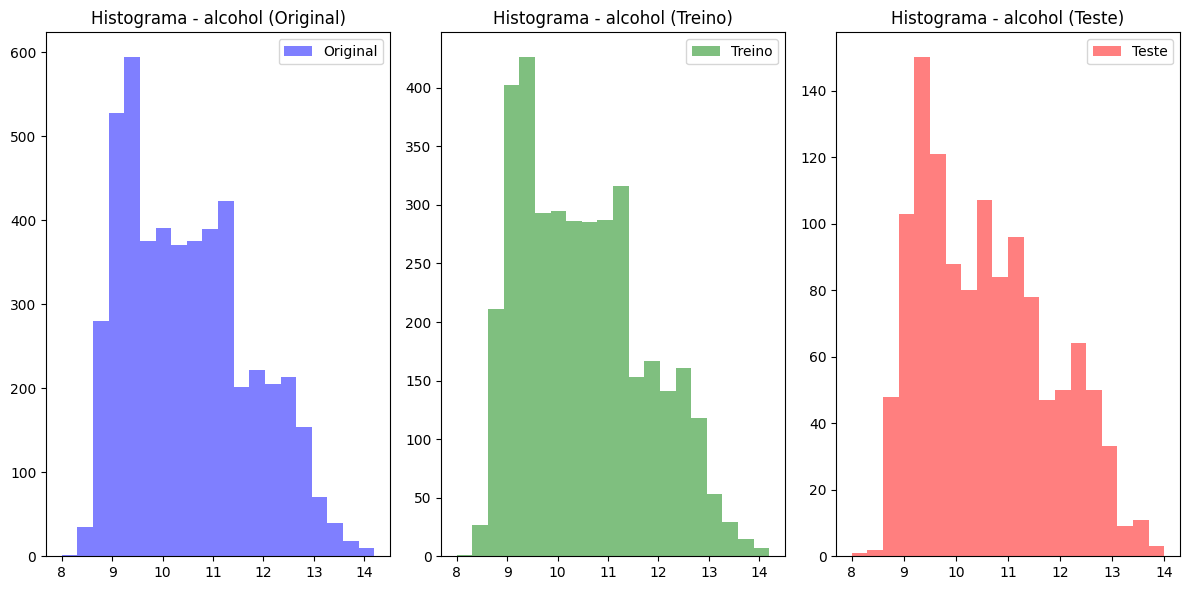

In [3]:
# Gráfico de histograma para uma coluna específica (substitua 'Coluna1' pelo nome da coluna desejada)
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.hist(original['alcohol'], bins=20, color='blue', alpha=0.5, label='Original')
plt.legend()
plt.title('Histograma - alcohol (Original)')

plt.subplot(1, 3, 2)
plt.hist(treino['alcohol'], bins=20, color='green', alpha=0.5, label='Treino')
plt.legend()
plt.title('Histograma - alcohol (Treino)')

plt.subplot(1, 3, 3)
plt.hist(teste['alcohol'], bins=20, color='red', alpha=0.5, label='Teste')
plt.legend()
plt.title('Histograma - alcohol (Teste)')

plt.tight_layout()
plt.show()

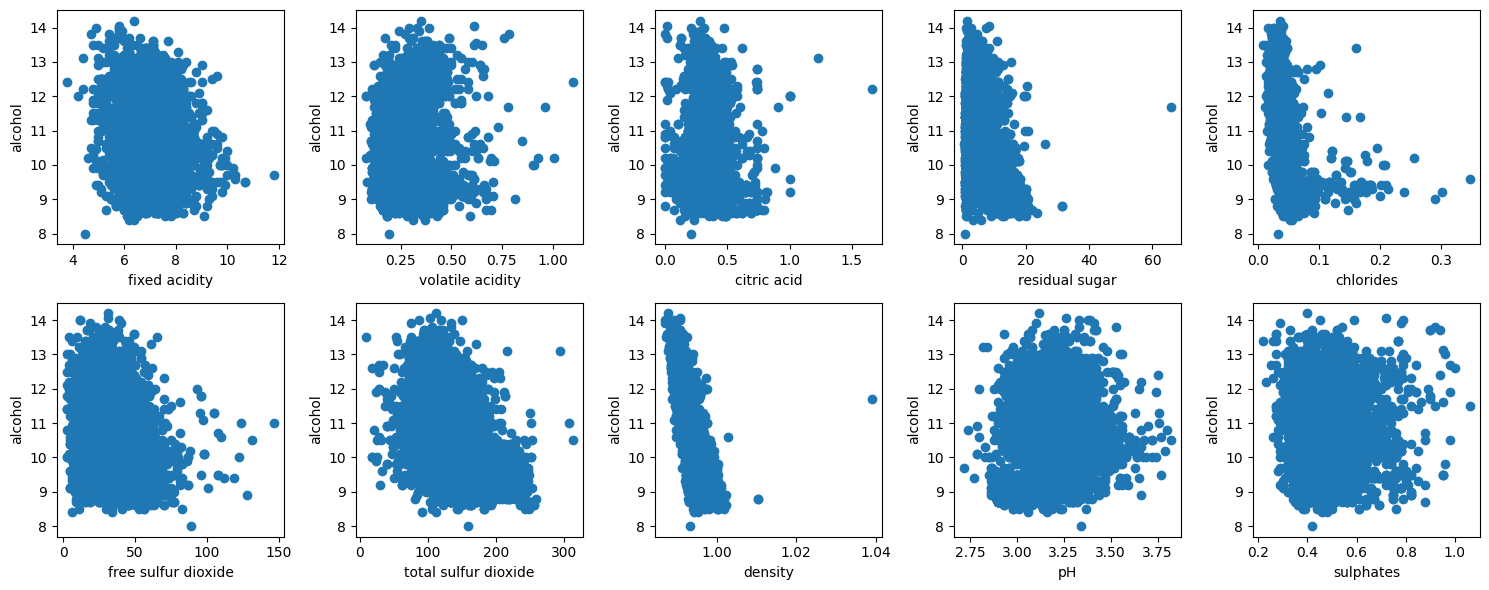

In [4]:
# Verificando o relacionamento de cada preditor com a saída do modelo
predictors = treino.drop(columns=['alcohol', 'quality']).columns.tolist()
Xm = treino.drop(columns=['alcohol', 'quality']).values
Ym = treino['alcohol'].values

fig, ax = plt.subplots(2, 5, figsize=(15, 6))
count = 0
for i in range(2):
    for j in range(5):
        ax[i,j].scatter(Xm[:,count],Ym);
        ax[i,j].set_xlabel(predictors[count]);
        ax[i,j].set_ylabel("alcohol");
        count = count + 1

plt.tight_layout();

In [5]:
# PRÉ-PROCESSAMENTO

# Função para padronizar os dados
def standardize(X):
    X_np = X.to_numpy()  # Convertendo a série para um array numpy
    Xs = X_np - X_np.mean(0)[None, :]
    X_scale = X_np.std(0)
    Xs = Xs / X_scale[None, :]
    return Xs

# TREINAMENTO
X = treino.drop(columns=['alcohol', 'quality'])
Xs = standardize(X)
Y = treino['alcohol']

# TESTE
X_te = teste.drop(columns=['alcohol', 'quality'])
Xs_te = standardize(X_te)
Y_te = teste['alcohol']

REGRESSÃO RIDGE UTILIZANDO A BIBLIOTECA SKLEARN

In [6]:
# REGRESSÃO LASSO COM VALIDAÇÃO CRUZADA

# Definindo o número divisões do conjunto de treinamento (k-folds)
K = 10
kfold = skm.KFold(K, random_state=0, shuffle=True)

# Definindo os lambdas
lambdas = 10**np.linspace(8, -2, 100) / Y.std()

# Aplicando a regressão lasso
ridgeCV = skl.ElasticNetCV(alphas=lambdas, l1_ratio=0, cv= kfold)
scaler = StandardScaler(with_mean=True, with_std=True)
pipeCV = Pipeline(steps=[('scaler', scaler), ('ridge', ridgeCV)])
pipeCV.fit(X, Y)
tuned_ridge = pipeCV.named_steps['ridge']
lambda_otimo = tuned_ridge.alpha_
log_lambda_otimo = -np.log(lambda_otimo)
print("Melhor lambda = ",lambda_otimo, " | -ln lambda = ",-np.log(lambda_otimo))

c:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2511.602120684204, tolerance: 0.5023204317115478
  model = cd_fast.enet_coordinate_descent_gram(
c:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarnin

Melhor lambda =  0.008127410644351053  | -ln lambda =  4.812512900082141


c:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.804e+02, tolerance: 5.559e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


c:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205649.7486911803, tolerance: 41.12994974666666
  model = cd_fast.enet_coordinate_descent_gram(
c:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning

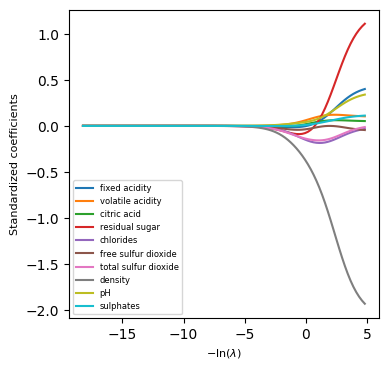

In [7]:
# Analisando o comportamento dos coeficientes em função do valor de lambda
soln_array = skl.ElasticNet.path(Xs, Y, l1_ratio=0., alphas=lambdas)[1]

soln_path = pd.DataFrame(soln_array.T, columns=X.columns , index=-np.log(lambdas))
soln_path.index.name = 'negative log(lambda)'

# Plotando
path_fig , ax = subplots(figsize=(4,4))
soln_path.plot(ax=ax, legend=False)
ax.set_xlabel('$-\ln(\lambda)$', fontsize=8)
ax.set_ylabel('Standardized coefficients', fontsize=8)
ax.legend(loc='upper left',bbox_to_anchor=(0, 0.46), fontsize = 6);


In [8]:
# Verificando qual o menor MSE médio do caminho
MSE_tr = np.min(tuned_ridge.mse_path_.mean(1))

# Verificando o RMSE médio
np.sqrt(MSE_tr)

0.4847204693962605

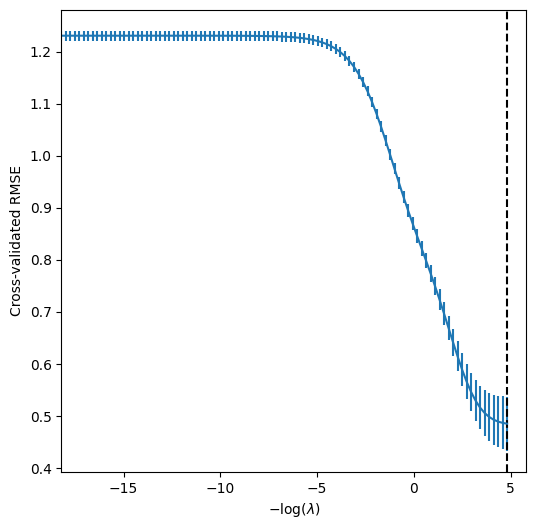

In [9]:
# Plotando o RMSE em função do log de lambda
ridgeCV_fig , ax = subplots(figsize=(6,6)) 
ax.errorbar(-np.log(tuned_ridge.alphas_), np.sqrt(tuned_ridge.mse_path_.mean(1)), yerr=np.sqrt(tuned_ridge.mse_path_).std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_ridge.alpha_), c='k', ls='--')
ax.set_xlim([-np.log(lambdas[0]), -np.log(lambdas[99])+1])
ax.set_xlabel('$-\log(\lambda)$', fontsize=10)
ax.set_ylabel('Cross-validated RMSE', fontsize=10);

In [12]:
# Coeficientes dos preditores
tuned_ridge.coef_

array([ 0.40087761,  0.10382453,  0.05247528,  1.11060653, -0.03268549,
       -0.04519507, -0.01275846, -1.93307145,  0.34019983,  0.11198405])

In [13]:
# TREINAMENTO
Y_hat_tr = pipeCV.predict(X)

mse_tr = mean_squared_error(Y, Y_hat_tr)
rmse_tr = np.sqrt(mse_tr)
print("RMSE no conjunto de treinamento:", rmse_tr)

r2_tr = r2_score(Y, Y_hat_tr)
print("R² no conjunto de treinamento:", r2_tr)

# TESTE
Y_hat_te = pipeCV.predict(X_te)

mse_te = mean_squared_error(Y_te, Y_hat_te)
rmse_te = np.sqrt(mse_te)
print("RMSE no conjunto de teste:", rmse_te)

r2_te = r2_score(Y_te, Y_hat_te)
print("R² no conjunto de teste:", r2_te)

RMSE no conjunto de treinamento: 0.46766946923464997
R² no conjunto de treinamento: 0.8554890685210282
RMSE no conjunto de teste: 0.38895334361555717
R² no conjunto de teste: 0.9001968787052885


REGRESSÃO RIDGE CODIFICADA DO ZERO

In [14]:
# Otimização dos coeficientes da regressão Ridge

def coef_L2(X, y, alpha=0.1):
    """
    Calcula os coeficientes da regressão ridge.
    
    Parâmetros:
    X (array): Matriz de features.
    y (array): Vetor de rótulos.
    alpha (float): Parâmetro de regularização.
    
    Retorna:
    coeficientes (array): Coeficientes encontrados pela regressão Ridge.
    """
    # Adicionando a coluna unitária para o beta0
    X = np.column_stack((np.ones(X.shape[0]), X))
    
    # Calcule os coeficientes usando a fórmula fechada
    coeficientes = np.linalg.inv(X.T @ X + alpha*np.identity(X.shape[1])) @ X.T @ y
    
    return coeficientes


In [13]:
# Função para fazer previsões com Regressão Ridge
def predict_L2(coeficientes, X):
    # Adicionando uma coluna unitária para o termo beta0
    X = np.column_stack((np.ones(X.shape[0]), X))
    
    # Calculando as previsões
    predict = X @ coeficientes
    
    return predict

In [15]:
# REGRESSÃO RIDGE PARA UM DETERMINADO LAMBDA
def fit_L2( X, y, alpha, num_folds):
    fold_tamanho = len(X) // num_folds
    rmse_resultados = []
    r2_resultados = []
    best_coef = []
    best_rmse = float('inf')
    
    for fold in range(num_folds):
        inicio = fold * fold_tamanho
        fim = (fold + 1) * fold_tamanho
        X_v = X[inicio:fim]
        y_v = y[inicio:fim]
        X_t = np.concatenate([X[:inicio], X[fim:]])
        y_t = np.concatenate([y[:inicio], y[fim:]])
        
        coef = coef_L2(X_t, y_t, alpha=alpha)
        y_hat = predict_L2(coef, X_v)
        
        rmse = np.sqrt(mean_squared_error(y_v, y_hat))
        r2 = r2_score(y_v, y_hat)
        
        if rmse < best_rmse:
            best_coef = coef
        
        rmse_resultados.append(rmse)
        r2_resultados.append(r2)
    
    return rmse_resultados, r2_resultados, best_coef


In [16]:
# VALIDAÇÃO CRUZADA PARA DEFINIR O MELHOR LAMBDA

def CV_L2(X, y, alphas, num_folds):
    best_alpha = None
    best_rmse = float('inf')  # Inicializar com um valor muito alto para encontrar um RMSE menor
    coeficientes_fold = []
    best_coef = []
    
    for alpha in alphas:
        rmse_resultados, r2_resultados, coef = fit_L2(X, y, alpha, num_folds)
        
        coeficientes_fold.append(coef)
        
        rmse_medio = np.mean(rmse_resultados)
        
        if rmse_medio < best_rmse:
            best_alpha = alpha
            best_coef = coef
            best_rmse = rmse_medio
    
    return best_alpha, best_coef, coeficientes_fold, best_rmse

In [17]:
# Validação cruzada para regressão ridge
best_lambda, best_coef, coefs, rmse_medio = CV_L2(X = Xs, y = Y, alphas = lambdas, num_folds = K)

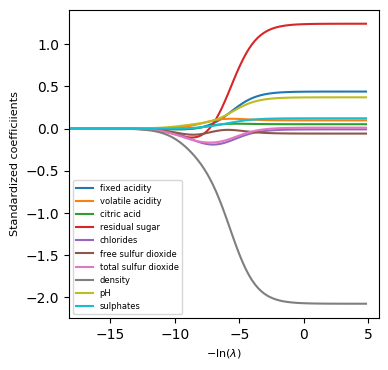

In [39]:
coefs_p = [sublista[1:] for sublista in coefs]
# Criar o DataFrame lambda_path com as colunas corretas e índice -log(lambdas)
lambda_path = pd.DataFrame(coefs_p, columns=X.columns, index=-np.log(lambdas))

# Plotando
path_fig , ax = subplots(figsize=(4,4))
lambda_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left',bbox_to_anchor=(0, 0.46), fontsize = 6)
ax.set_xlim([-np.log(lambdas[0]), -np.log(lambdas[99])+1])
ax.set_xlabel('$-\ln(\lambda)$', fontsize=8)
ax.set_ylabel('Standardized coefficiients', fontsize=8);

In [20]:
# OBTENDO OS PARÂMETROS PARA TREINAMENTO E TESTE 

# TREINAMENTO
Y_hat_tr = predict_L2(best_coef, Xs)

mse_tr = mean_squared_error(Y, Y_hat_tr)
rmse_tr = np.sqrt(mse_tr)
print("RMSE no conjunto de treinamento:", rmse_tr)

r2_tr = r2_score(Y, Y_hat_tr)
print("R² no conjunto de treinamento:", r2_tr)

# TESTE
Y_hat_te = predict_L2(best_coef, Xs_te)

mse_te = mean_squared_error(Y_te, Y_hat_te)
rmse_te = np.sqrt(mse_te)
print("RMSE no conjunto de teste:", rmse_te)

r2_te = r2_score(Y_te, Y_hat_te)
print("R² no conjunto de teste:", r2_te)

RMSE no conjunto de treinamento: 0.46375619532030965
R² no conjunto de treinamento: 0.857897371433571
RMSE no conjunto de teste: 0.3743977139715965
R² no conjunto de teste: 0.9075268861174837


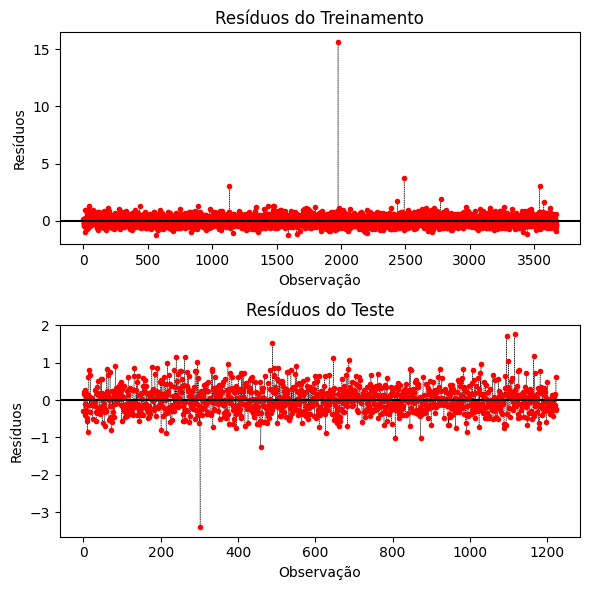

In [21]:
residuos_treinamento = Y - Y_hat_tr
residuos_teste = Y_te - Y_hat_te

# Criar uma figura com 2 subplots
fig, axs = plt.subplots(2, 1, figsize=(6, 6))

# Plotar os resíduos do treinamento no primeiro subplot
axs[0].plot(residuos_treinamento, marker='o', markersize=4, linestyle='--', color='black', markerfacecolor='red', linewidth=0.3, markeredgewidth=0)
axs[0].axhline(y=0, color='black', linestyle='-')
axs[0].set_xlabel('Observação')
axs[0].set_ylabel('Resíduos')
axs[0].set_title('Resíduos do Treinamento')

# Plotar os resíduos do teste no segundo subplot
axs[1].plot(residuos_teste, marker='o', markersize=4, linestyle='--', color='black', markerfacecolor='red', linewidth=0.3, markeredgewidth=0)
axs[1].axhline(y=0, color='black', linestyle='-')
axs[1].set_xlabel('Observação')
axs[1].set_ylabel('Resíduos')
axs[1].set_title('Resíduos do Teste')

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Mostrar a figura
plt.show()



-3.4000407572039144
10.526263945578231
14.0


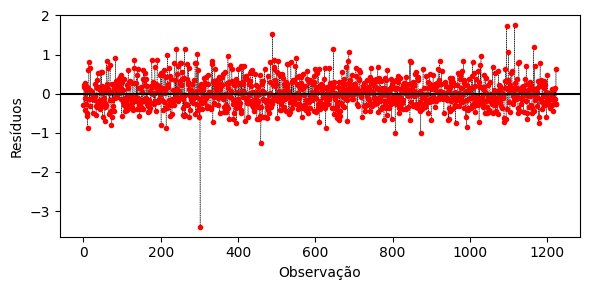

In [29]:
residuos_teste = Y_te - Y_hat_te
print(min(residuos_teste))
print(np.mean(Y_te))
print(max(Y_te))
# Criar uma figura com 2 subplots
fig, ax= plt.subplots(figsize=(6, 3))
# Plotar os resíduos do teste no segundo subplot
ax.plot(residuos_teste, marker='o', markersize=4, linestyle='--', color='black', markerfacecolor='red', linewidth=0.3, markeredgewidth=0)
ax.axhline(y=0, color='black', linestyle='-')
ax.set_xlabel('Observação')
ax.set_ylabel('Resíduos')
#ax.set_title('Resíduos do Teste')

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Mostrar a figura
plt.show()

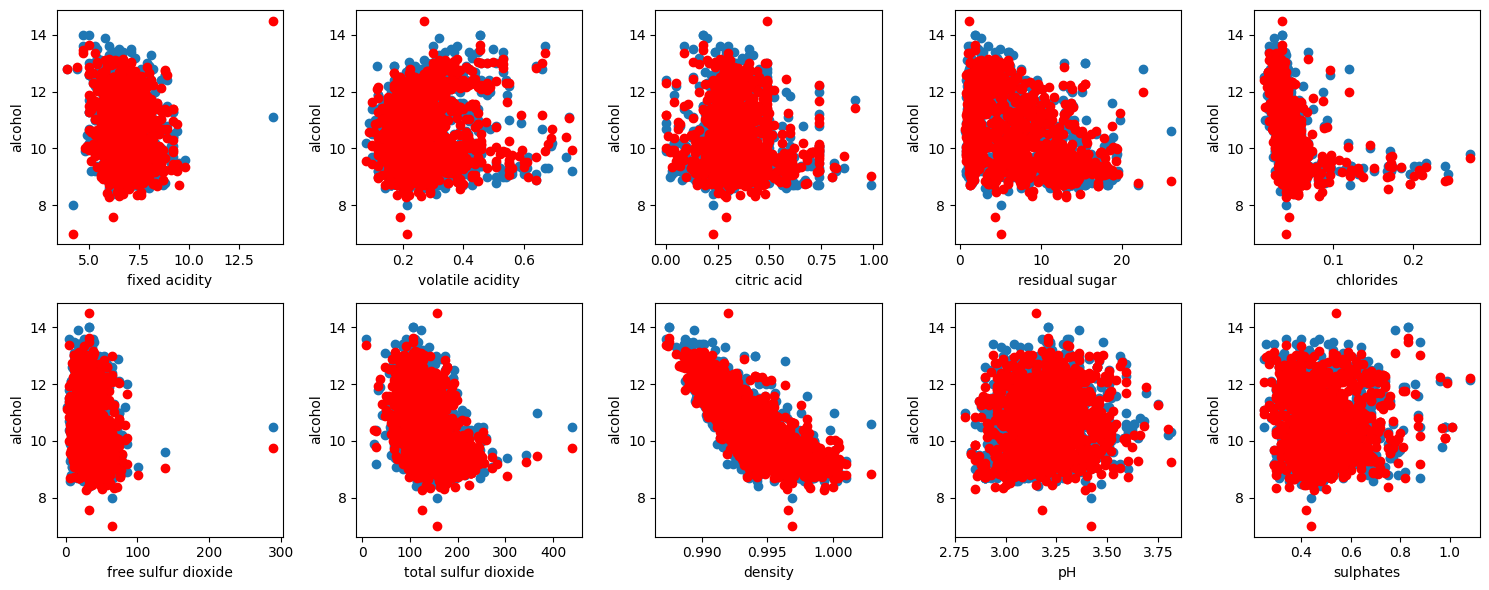

In [23]:
# Verificando o relacionamento de cada preditor (real e previsto) com a saída do modelo
predictors = teste.drop(columns=['alcohol', 'quality']).columns.tolist()
Xm = teste.drop(columns=['alcohol', 'quality']).values
Ym = teste['alcohol'].values

fig, ax = plt.subplots(2, 5, figsize=(15, 6))
count = 0
for i in range(2):
    for j in range(5):
        ax[i,j].scatter(Xm[:,count],Ym);
        ax[i,j].scatter(Xm[:,count],Y_hat_te,color='red');
        ax[i,j].set_xlabel(predictors[count]);
        ax[i,j].set_ylabel("alcohol");
        count = count + 1

plt.tight_layout();